In [150]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

import fbnet_building_blocks.fbnet_modeldef as modeldef

## 1. Load sampled model_def & Lookup Table(Flops)

In [55]:
def make_lut(path = 'supernet_functions/lookup_table.txt'):
    f = open(path, 'r')
    lut = f.readlines()
    f.close()

    # remove \n
    lut = [x[:-1] for x in lut]
    
    candidate_blocks_name = lookup[0].split()
    print('candidate_blocks : ', candidate_blocks_name)
    
    candidate_blocks = dict()

    for x in candidate_blocks_name:
        candidate_blocks[x] = list()
        
        # itertion on row (layer)
    for i in range(1, len(lut)):
        # print(lut[i])

        lut_split = lut[i].split(' ')

        # itertion on column (candiate block)
        for j in range(len(lut_split)):

            candidate_blocks[candidate_blocks_name[j]].append(float(lut_split[j]))

    return candidate_blocks

In [51]:
# candidate_blocks

In [58]:
lut = make_lut()

candidate_blocks :  ['ir_k3_e1', 'ir_k3_s2', 'ir_k3_e3', 'ir_k3_e6', 'ir_k5_e1', 'ir_k5_s2', 'ir_k5_e3', 'ir_k5_e6', 'skip']


## 2. make plot from architecture

In [72]:
# return k, e, [skip?]

"""
ir_k3_e1 - 3 1 / ir_k3_s2 - 3 0.5 / ir_k3_e3 - 3 3 /
ir_k3_e6 - 3 6 / ir_k5_e1 - 5 1 / ir_k5_s2 - 5 0.5 /
ir_k5_e3 - 5 3 / ir_k5_e6 - 5 6 / skip - 0 0
"""
def conversion(block):
    if block == 'skip':
        return 0, 0
    else :
        splited = block.split('_')
        return int(splited[1][-1]), int(splited[2][-1]) if splited[2][0] == 'e' else 0.5
        
        
def conversion_for_block(model):
    k_list = []
    e_list = []
    for block in model:
        k, e = conversion(block[0])
        
        k_list.append(k)
        e_list.append(e)
        
    return(k_list, e_list)

In [73]:
# check sampled models
model_dictionary = modeldef.MODEL_ARCH
print(list(modeldef.MODEL_ARCH.keys()))

model_dictionary['cifar100_ref_30M_lambda_5e-1_skip']['block_op_type']

['fbnet_a', 'fbnet_b', 'fbnet_c', 'fbnet_96_035_1', 'fbnet_samsung_s8', 'fbnet_iphonex', 'fbnet_cpu_sample1', 'fbnet_cpu_sample2', 'mb2_example', 'mb2', 'test1', 'test2', 'test3', 'test4', 'test5', 'FL_ref_30M', 'FL_ref_300M', 'cifar100_ref_300M', 'cifar100_ref_30M', 'cifar100_ref_30M_skip', 'm2_orig', 'mb2_search', 'cifar100_fbnet', 'FBNet_DoReFa_w2a2', 'cifar100_ref_30M_lambda_5e-2', 'cifar100_ref_30M_lambda_5e-1', 'cifar100_ref_30M_lambda_5e-1_skip']


[['ir_k3_e1'],
 ['ir_k3_e1'],
 ['skip'],
 ['ir_k3_e3'],
 ['skip'],
 ['skip'],
 ['ir_k5_e6'],
 ['skip'],
 ['skip'],
 ['ir_k5_s2'],
 ['ir_k3_e6'],
 ['skip'],
 ['skip'],
 ['ir_k5_e6'],
 ['ir_k5_s2'],
 ['skip'],
 ['ir_k3_e6']]

In [104]:
model_name = 'cifar100_ref_30M_lambda_5e-1'
model = model_dictionary[model_name]['block_op_type']

model_orig_name = 'm2_orig'
model_orig = model_dictionary[model_orig_name]['block_op_type']

In [106]:
k, e = conversion_for_block(model)
k_orig, e_orig = conversion_for_block(model_orig)

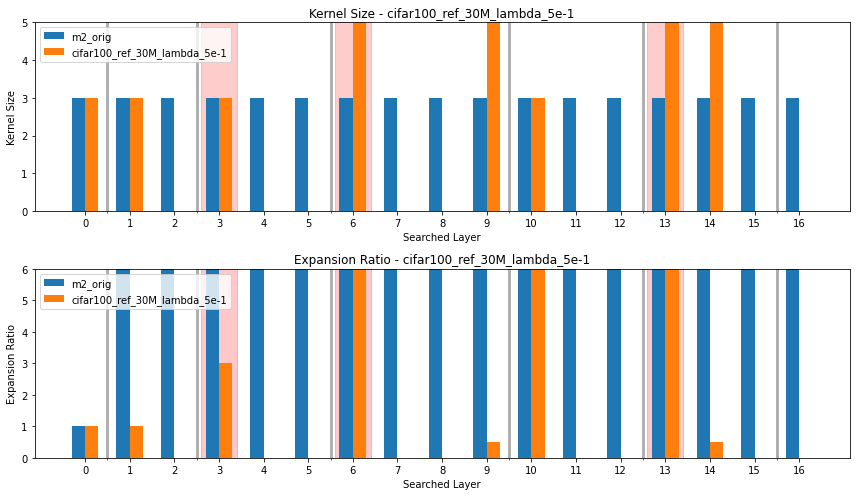

In [186]:
fig = plt.figure(figsize = (12,7))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

x = np.arange(len(model))  # the label locations
width = 0.3  # the width of the bars

strides = [3, 6, 13] # stride 2 layer
stride_witdh = 0.4 # the width of the strides


# stride
for stride in strides:
    ax1.add_patch(Rectangle((stride - (stride_witdh), 0), (stride_witdh) * 2, height=10, alpha=0.2, color='r'))


# split with channel blocks
ax1.set_xticks([0.5, 2.5, 5.5, 9.5, 12.5, 15.5], minor=True)
ax1.xaxis.grid(True, which='minor', linewidth=3)

ax1.bar(x - width/2, k_orig, width, alpha=1.0 , label=model_orig_name)
ax1.bar(x + width/2, k, width, alpha=1.0 , label=model_name)
ax1.set_xlabel('Searched Layer')
ax1.set_ylabel('Kernel Size')
ax1.legend()
ax1.set_title(f"Kernel Size - {model_name}")
ax1.set_xticks(range(len(model)))
ax1.set_ylim(0,5)



# stride
for stride in strides:
    ax2.add_patch(Rectangle((stride - (stride_witdh), 0), (stride_witdh) * 2, height=10, alpha=0.22, color='r'))


# split with channel blocks
ax2.set_xticks([0.5, 2.5, 5.5, 9.5, 12.5, 15.5], minor=True)
ax2.xaxis.grid(True, which='minor', linewidth=3)

ax2.bar(x - width/2, e_orig, width, alpha=1.0 , label=model_orig_name)
ax2.bar(x + width/2, e, width, alpha=1.0 , label=model_name)
ax2.set_xlabel('Searched Layer')
ax2.set_ylabel('Expansion Ratio')
ax2.legend()
ax2.set_title(f"Expansion Ratio - {model_name}")
ax2.set_xticks(range(len(model)))
ax2.set_ylim(0,6)



fig.tight_layout() 
plt.show()